In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [2]:
from pycaret.datasets import get_data
data = get_data('/content/drive/MyDrive/train')

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
w = data.drop(['id'], axis = 1)
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [4]:
from pycaret.classification import *
from sklearn import preprocessing
from imblearn.under_sampling import AllKNN, TomekLinks

le = preprocessing.LabelEncoder()
newdata1 = w.apply(le.fit_transform)
newdata1.head()

,label,tweet
0,0,4653
1,0,9491
2,0,564
3,0,6704
4,0,4954


In [5]:
newdata = setup(newdata1, target = 'label', session_id = 123, fix_imbalance = True, fix_imbalance_method = AllKNN())

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(31962, 2)"
4,Transformed data shape,"(28591, 2)"
5,Transformed train set shape,"(19002, 2)"
6,Transformed test set shape,"(9589, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [6]:
data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,1.3980
nb,Naive Bayes,0.9299,0.6009,0.0000,0.0000,0.0000,0.0000,0.0000,0.2800
ridge,Ridge Classifier,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,0.2640
qda,Quadratic Discriminant Analysis,0.9299,0.6010,0.0000,0.0000,0.0000,0.0000,0.0000,0.2120
lda,Linear Discriminant Analysis,0.9299,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,0.1420
dummy,Dummy Classifier,0.9299,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2710
gbc,Gradient Boosting Classifier,0.9298,0.7955,0.1695,0.5004,0.2527,0.2252,0.2624,1.5450
svm,SVM - Linear Kernel,0.9295,0.5184,0.0000,0.0000,0.0000,-0.0007,-0.0040,0.7070
ada,Ada Boost Classifier,0.9293,0.7623,0.0166,0.0878,0.0279,0.0236,0.0319,0.7430
xgboost,Extreme Gradient Boosting,0.9239,0.7936,0.1300,0.3863,0.1914,0.1618,0.1898,0.4640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

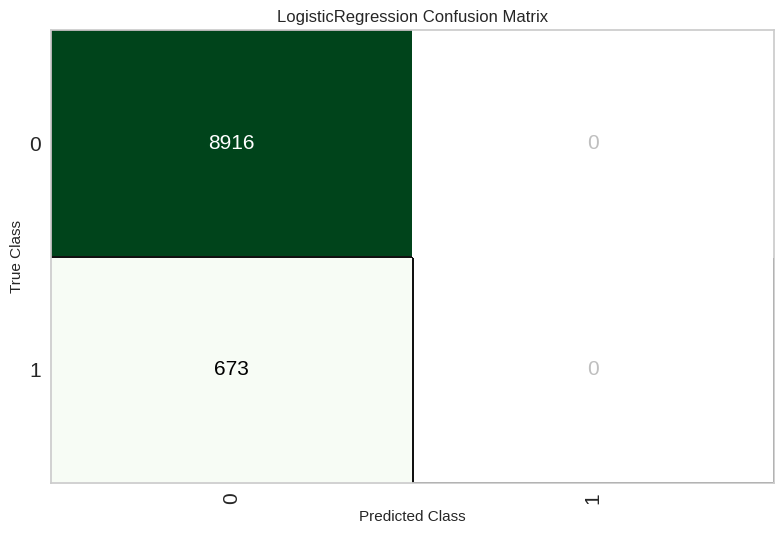

In [8]:
plot_model(best, plot = 'confusion_matrix')

In [9]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
lr = create_model('lr')
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
l1 = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [18]:
l2 = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
nb = create_model('nb')
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5831,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5865,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5831,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.6098,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.6033,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.6430,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.6033,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5868,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.6022,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5831,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5865,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5831,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.6098,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.6033,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.6430,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.6033,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5868,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.6022,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
n1 = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9298,0.6088,0.0000,0.0000,0.0000,0.0000,0.0000


In [22]:
n2 = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9298,0.6088,0.0000,0.0000,0.0000,0.0000,0.0000


In [23]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
r1 = predict_model(ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9298,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [26]:
r2 = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9298,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [27]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
lda = create_model('lda')
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9298,0.5339,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
ld1 = predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [30]:
ld2 = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9298,0.5200,0.0000,0.0000,0.0000,0.0000,0.0000


In [33]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9307,0.7977,0.1783,0.5185,0.2654,0.2380,0.2760
1,0.9272,0.7906,0.1656,0.4483,0.2419,0.2120,0.2415
2,0.9298,0.7956,0.1975,0.5000,0.2831,0.2535,0.2841
3,0.9276,0.7820,0.1410,0.4400,0.2136,0.1860,0.2198
4,0.9334,0.8108,0.2038,0.5714,0.3005,0.2737,0.3144
5,0.9267,0.7789,0.1592,0.4386,0.2336,0.2039,0.2332
6,0.9321,0.7827,0.1465,0.5610,0.2323,0.2093,0.2625
7,0.9329,0.8119,0.1975,0.5636,0.2925,0.2657,0.3067
8,0.9343,0.8175,0.1847,0.6042,0.2829,0.2586,0.3095


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9361,0.8274,0.1783,0.6667,0.2814,0.2595,0.3230
1,0.9294,0.8201,0.1274,0.4878,0.2020,0.1781,0.2234
2,0.9334,0.8173,0.1783,0.5833,0.2732,0.2485,0.2975
3,0.9294,0.8078,0.1346,0.4773,0.2100,0.1850,0.2266
4,0.9352,0.8381,0.1847,0.6304,0.2857,0.2622,0.3178
5,0.9316,0.8034,0.1465,0.5476,0.2312,0.2077,0.2585
6,0.9321,0.8088,0.1210,0.5758,0.2000,0.1800,0.2422
7,0.9383,0.8167,0.1911,0.7317,0.3030,0.2822,0.3538
8,0.9392,0.8324,0.1783,0.8000,0.2917,0.2731,0.3602


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [31]:
g1 = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9338,0.7962,0.1932,0.5856,0.2905,0.2649,0.3106


In [32]:
g2 = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9343,0.8163,0.1679,0.6175,0.2640,0.2412,0.2988


In [34]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…